In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


ValueError: color kwarg must have one color per data set. 3 data sets and 1 colors were provided

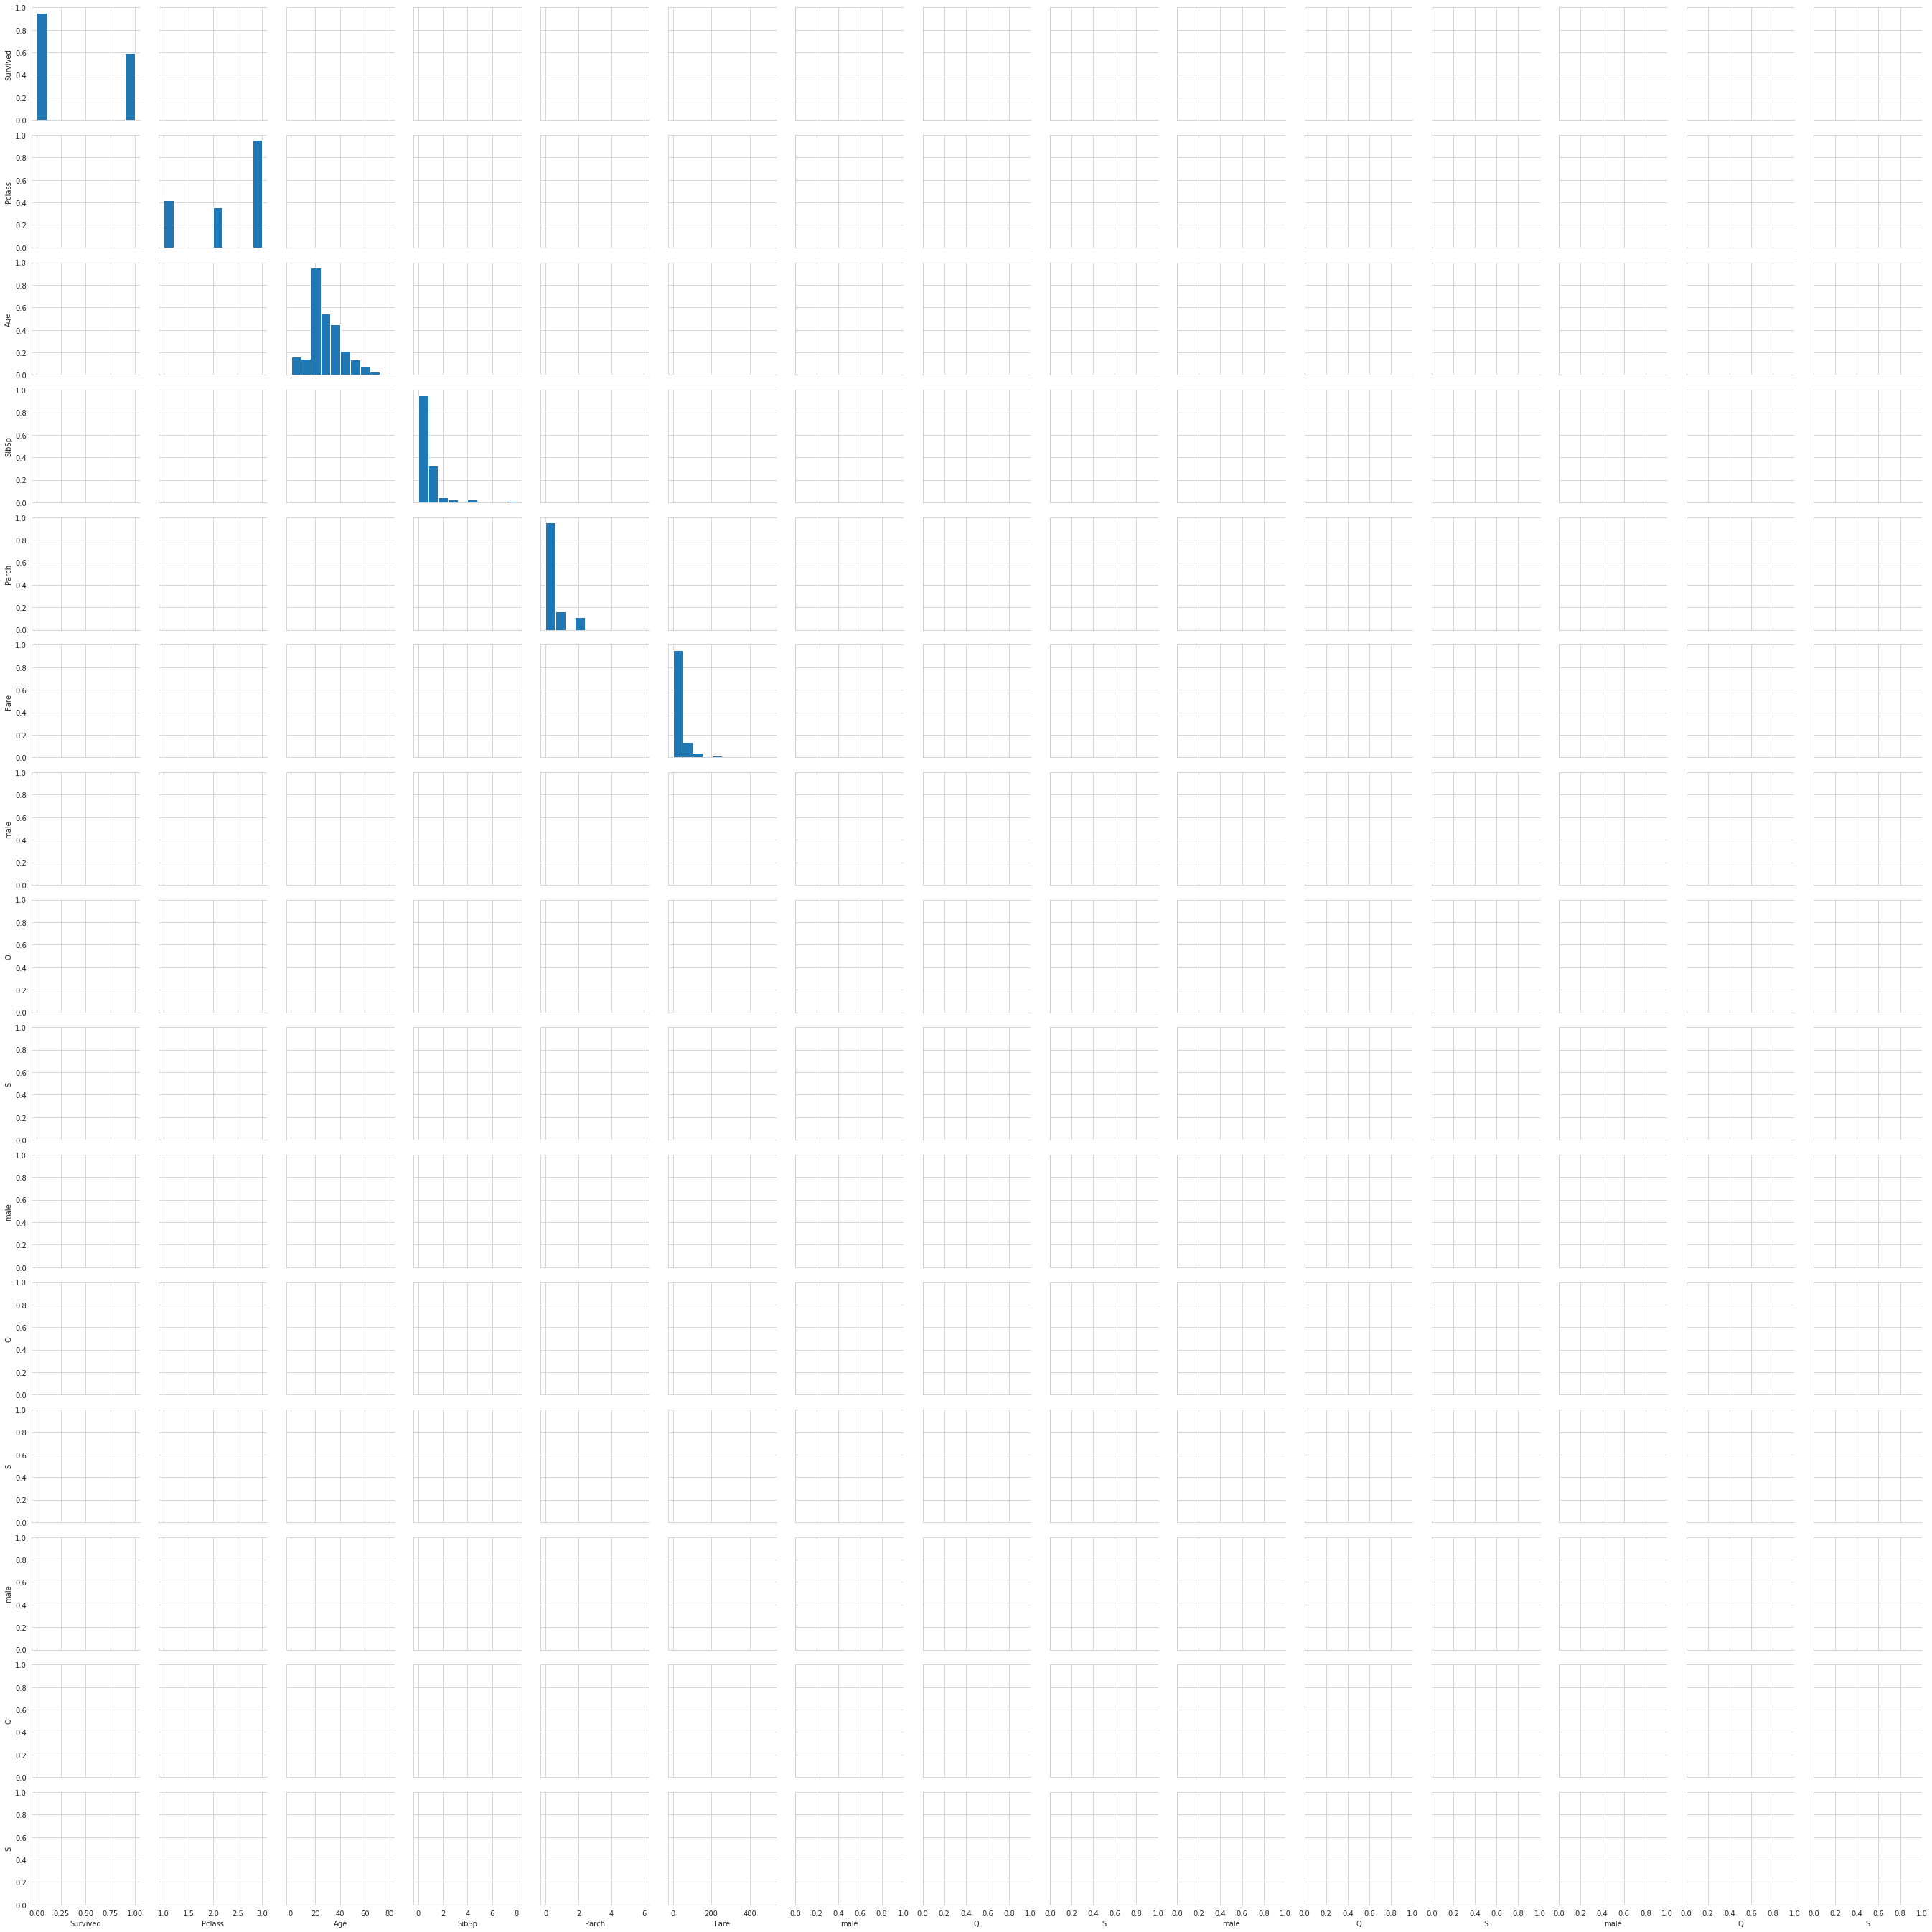

In [89]:
sns.pairplot(train)

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

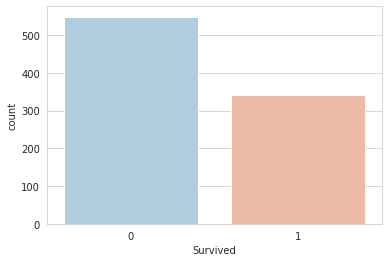

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

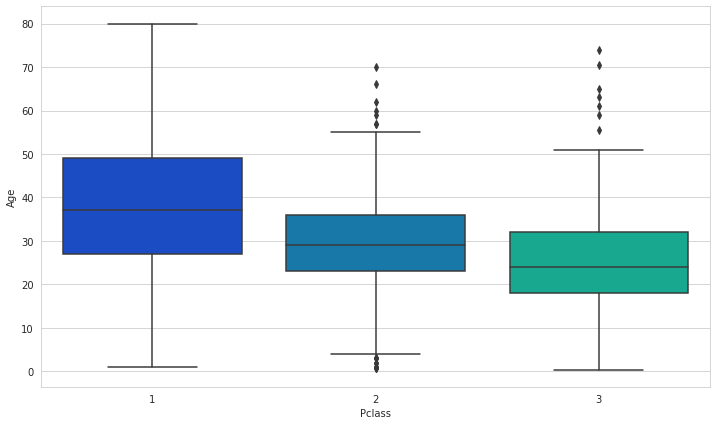

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [10]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

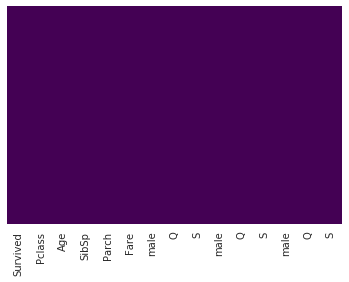

In [78]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
train.drop('Cabin',axis=1,inplace=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [21]:
# # train.drop(['PassengerId'],axis=1,inplace=True)
# train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
train = pd.concat([train,sex,embark],axis=1)

In [23]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,1,0,1


In [24]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.33, 
                                                    random_state=101)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logmodel = LogisticRegression()
logmodel.fit(X_test,y_test)

/home/shaxpy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
predictions = logmodel.predict(X_test)

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       169
           1       0.77      0.72      0.75       126

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(y_test,predictions)

array([[142,  27],
       [ 35,  91]])

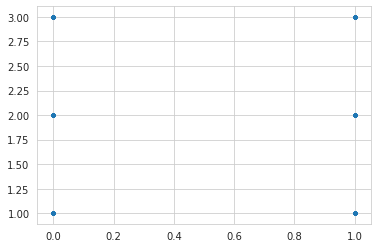

In [110]:
plt.scatter(train.iloc[:, 0],train.iloc[:, 1], s=10, label='Survived')


# #TEST DATA PREPROCESSING

In [ ]:
test= pd.read_csv(r"titanic_test.csv")



In [112]:
test.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


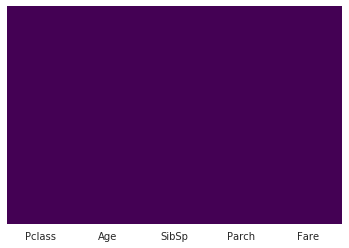

In [113]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [114]:
test.columns
test.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['PassengerId'] not found in axis"

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [115]:
def impute_age2(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 43

        elif Pclass == 2:
            return 27

        else:
            return 24

    else:
        return Age

In [116]:
test['Age'] = test[['Age','Pclass']].apply(impute_age2,axis=1)

In [117]:
# test.drop('Cabin',axis=1,inplace=True)